In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn import preprocessing

import json
import numpy as np
import pandas as pd
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D ,Dense, Flatten ,  MaxPool2D
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score, plot_confusion_matrix
import xgboost as xgb

import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder



plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']


In [2]:
data = pd.read_csv('predict.csv')
data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02-01-2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02-01-2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02-01-2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02-01-2016,3719,4,0H2,549KK,1.0,5.59
4,5,02-01-2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04-07-2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04-07-2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04-07-2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04-07-2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [3]:

data2 = data.drop(['Customer_ID','Transaction_ID','Unnamed: 0'],axis=1)
data2['price']= data2['Sales_Amount']/data2['Quantity']

data2['sales_in_dol'] = data2['price']*data2['Quantity']

data2 = data2.drop(['Sales_Amount'],axis=1)

data2

,Date,SKU_Category,SKU,Quantity,price,sales_in_dol
0,02-01-2016,X52,0EM7L,1.0,3.130000,3.13
1,02-01-2016,2ML,68BRQ,1.0,5.460000,5.46
2,02-01-2016,0H2,CZUZX,1.0,6.350000,6.35
3,02-01-2016,0H2,549KK,1.0,5.590000,5.59
4,02-01-2016,0H2,K8EHH,1.0,6.880000,6.88
...,...,...,...,...,...,...
131701,04-07-2016,IEV,FO112,3.0,2.153333,6.46
131702,04-07-2016,N8U,I36F2,1.0,4.500000,4.50
131703,04-07-2016,U5F,4X8P4,1.0,5.190000,5.19
131704,04-07-2016,0H2,ZVTO4,1.0,4.570000,4.57


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          131706 non-null  object 
 1   SKU_Category  131706 non-null  object 
 2   SKU           131706 non-null  object 
 3   Quantity      131706 non-null  float64
 4   price         131706 non-null  float64
 5   sales_in_dol  131706 non-null  float64
dtypes: float64(3), object(3)
memory usage: 6.0+ MB


In [5]:
data2['date'] = pd.to_datetime(data2['Date'] , dayfirst=True)

data2

,Date,SKU_Category,SKU,Quantity,price,sales_in_dol,date
0,02-01-2016,X52,0EM7L,1.0,3.130000,3.13,2016-01-02
1,02-01-2016,2ML,68BRQ,1.0,5.460000,5.46,2016-01-02
2,02-01-2016,0H2,CZUZX,1.0,6.350000,6.35,2016-01-02
3,02-01-2016,0H2,549KK,1.0,5.590000,5.59,2016-01-02
4,02-01-2016,0H2,K8EHH,1.0,6.880000,6.88,2016-01-02
...,...,...,...,...,...,...,...
131701,04-07-2016,IEV,FO112,3.0,2.153333,6.46,2016-07-04
131702,04-07-2016,N8U,I36F2,1.0,4.500000,4.50,2016-07-04
131703,04-07-2016,U5F,4X8P4,1.0,5.190000,5.19,2016-07-04
131704,04-07-2016,0H2,ZVTO4,1.0,4.570000,4.57,2016-07-04


In [6]:
data2['q'] = data2['date'].dt.quarter
data2

,Date,SKU_Category,SKU,Quantity,price,sales_in_dol,date,q
0,02-01-2016,X52,0EM7L,1.0,3.130000,3.13,2016-01-02,1
1,02-01-2016,2ML,68BRQ,1.0,5.460000,5.46,2016-01-02,1
2,02-01-2016,0H2,CZUZX,1.0,6.350000,6.35,2016-01-02,1
3,02-01-2016,0H2,549KK,1.0,5.590000,5.59,2016-01-02,1
4,02-01-2016,0H2,K8EHH,1.0,6.880000,6.88,2016-01-02,1
...,...,...,...,...,...,...,...,...
131701,04-07-2016,IEV,FO112,3.0,2.153333,6.46,2016-07-04,3
131702,04-07-2016,N8U,I36F2,1.0,4.500000,4.50,2016-07-04,3
131703,04-07-2016,U5F,4X8P4,1.0,5.190000,5.19,2016-07-04,3
131704,04-07-2016,0H2,ZVTO4,1.0,4.570000,4.57,2016-07-04,3


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          131706 non-null  object        
 1   SKU_Category  131706 non-null  object        
 2   SKU           131706 non-null  object        
 3   Quantity      131706 non-null  float64       
 4   price         131706 non-null  float64       
 5   sales_in_dol  131706 non-null  float64       
 6   date          131706 non-null  datetime64[ns]
 7   q             131706 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 8.0+ MB


In [8]:
data2['SKU'].unique()

array(['0EM7L', '68BRQ', 'CZUZX', ..., '4BF3L', 'EQTNO', '9E9GV'],
      dtype=object)

In [9]:
len(data['SKU'].unique())

5242

<AxesSubplot:xlabel='date'>

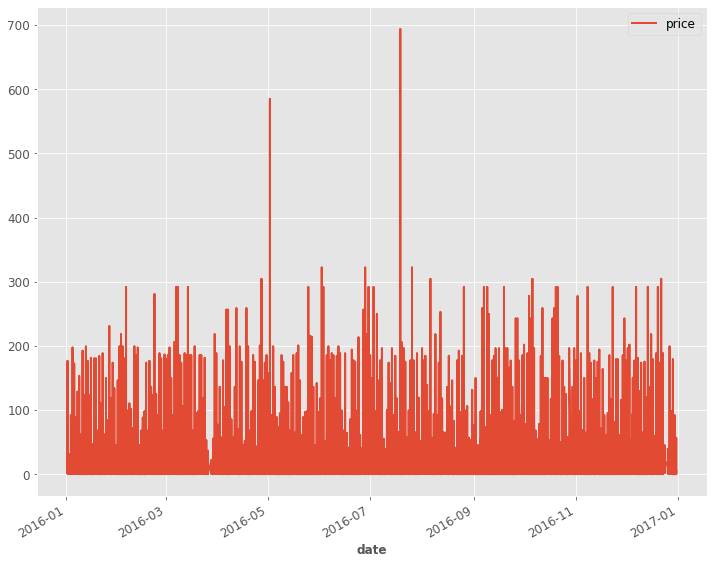

In [10]:
data2.plot(x= 'date',y= 'price')

In [11]:
data2.count('columns')

0         8
1         8
2         8
3         8
4         8
         ..
131701    8
131702    8
131703    8
131704    8
131705    8
Length: 131706, dtype: int64

In [12]:
data2.groupby(['SKU','date','Quantity'])['SKU'].count()

SKU    date        Quantity
00GVC  2016-01-05  1.0         1
       2016-06-01  1.0         1
00OK1  2016-03-11  1.0         1
       2016-04-04  2.0         1
       2016-04-06  1.0         1
                              ..
ZZM1A  2016-12-06  1.0         1
       2016-12-09  1.0         1
       2016-12-14  2.0         1
ZZNC5  2016-12-02  1.0         1
ZZX6K  2016-10-21  1.0         1
Name: SKU, Length: 111547, dtype: int64

In [13]:
df_grouped_price =data2.groupby(['SKU','q'])['price'].mean()
df_grouped_price

SKU    q
00GVC  1     17.680000
       2     17.680000
00OK1  1      1.270000
       2      1.273571
       3      1.270000
               ...    
ZZM1A  2      6.231389
       3      6.229375
       4      6.229375
ZZNC5  4     10.790000
ZZX6K  4    111.810000
Name: price, Length: 14431, dtype: float64

In [14]:
df_grouped_sales =data2.groupby(['SKU','q'])['sales_in_dol'].sum()
df_grouped_sales

SKU    q
00GVC  1     17.68
       2     17.68
00OK1  1      1.27
       2     12.75
       3      6.35
             ...  
ZZM1A  2     81.02
       3     80.98
       4     87.21
ZZNC5  4     10.79
ZZX6K  4    111.81
Name: sales_in_dol, Length: 14431, dtype: float64

<AxesSubplot:xlabel='SKU,q'>

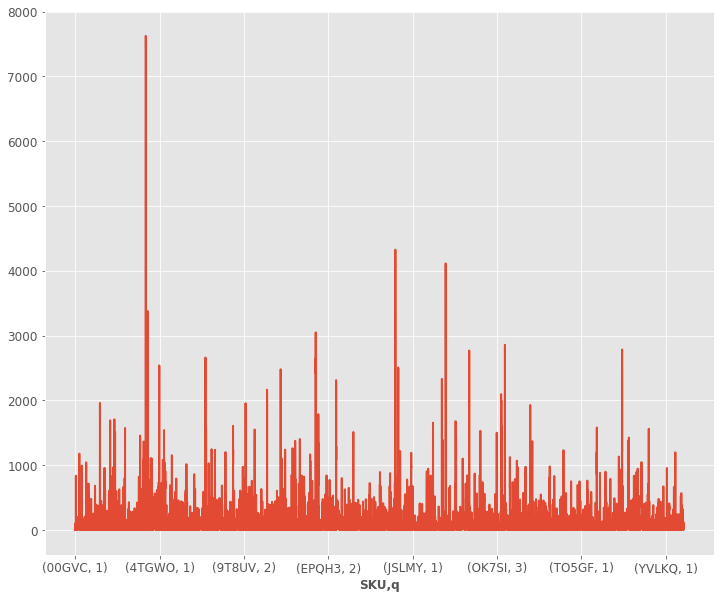

In [15]:
df_grouped_sales.plot( y ='sales_in_dol')

<AxesSubplot:xlabel='price', ylabel='sales_in_dol'>

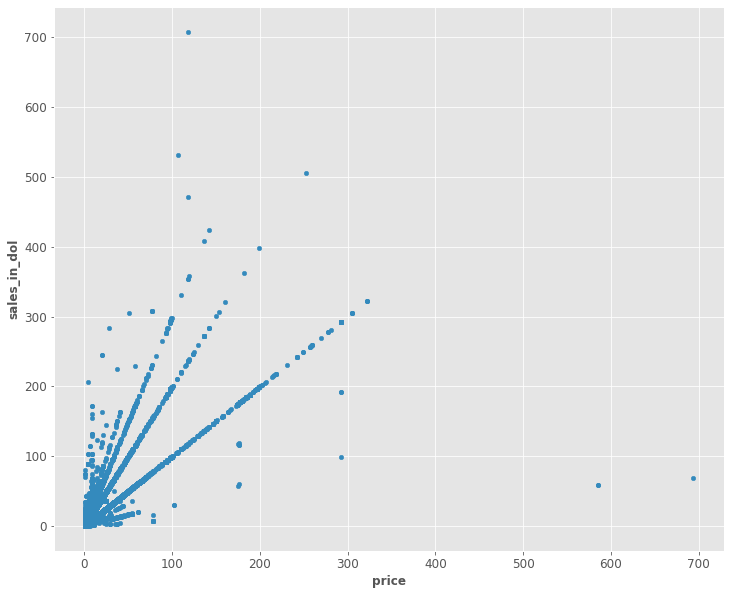

In [16]:
data2.plot.scatter(x='price',y='sales_in_dol')

<AxesSubplot:xlabel='Quantity', ylabel='sales_in_dol'>

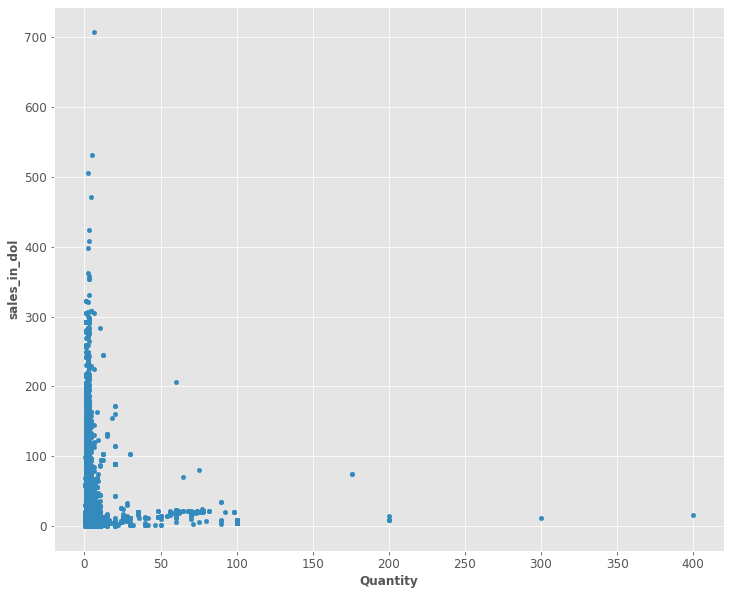

In [17]:
data2.plot.scatter(x='Quantity',y='sales_in_dol')

In [18]:
def draw_corr(data,figsize = (12,12)):
    corr =data.corr()
    fig = plt.figure(figsize = figsize)
    # plt.matshow(correlations)
    plt.matshow(corr, cmap= 'RdBu', fignum=fig.number)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.grid(False)
    plt.colorbar()

C:\Users\Mario\AppData\Local\Temp\ipykernel_13428\1708466143.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


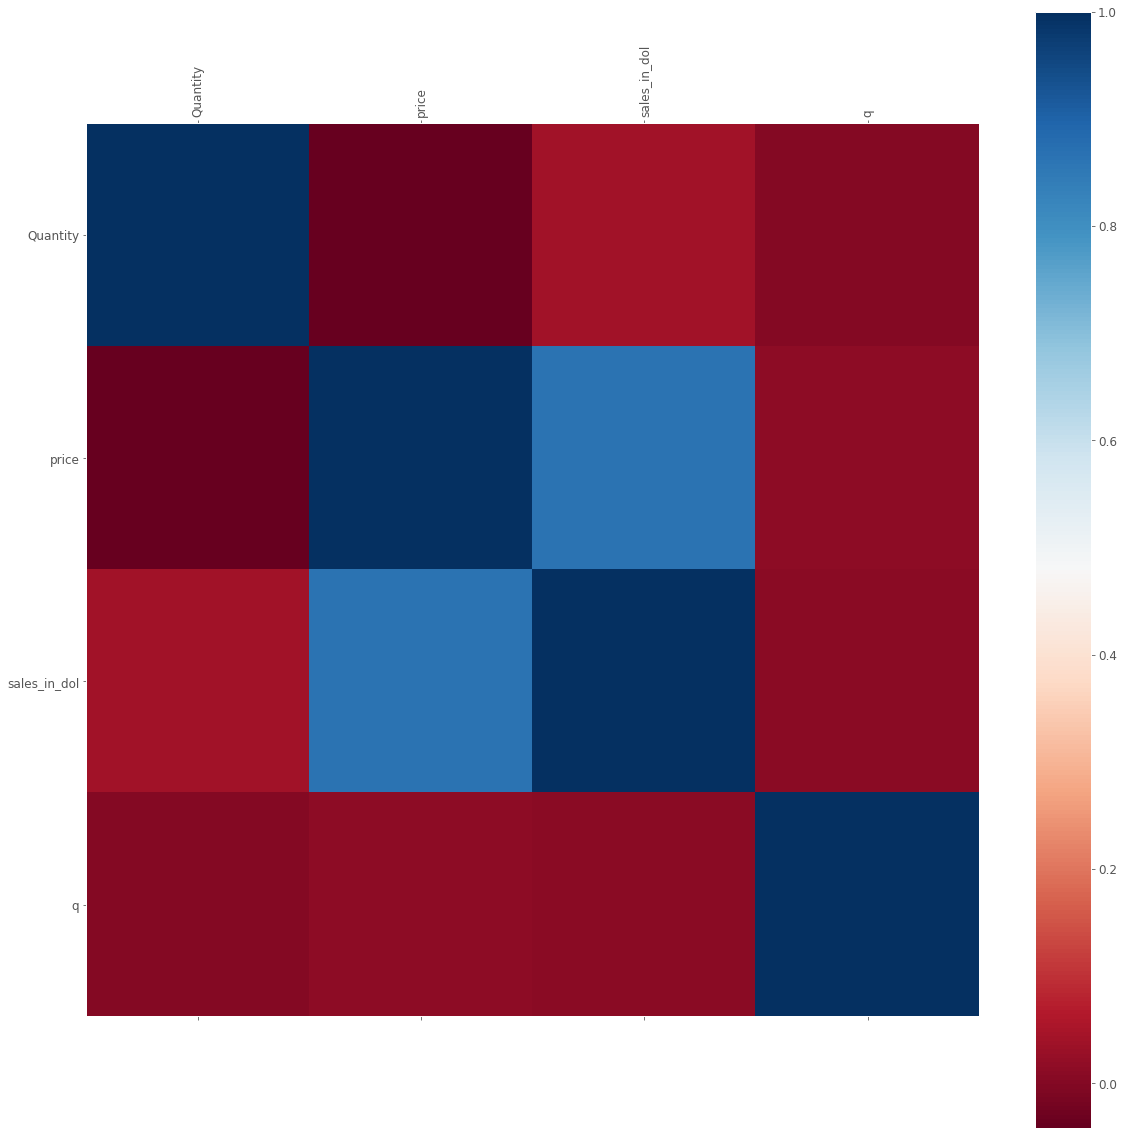

In [19]:
draw_corr(data2,figsize=(20,20))

In [20]:
#Preprocessing
data["transaction_date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y',errors='ignore')
data["quantity_int"] = np.ceil(data["Quantity"]).astype("int")
data["Customer_ID"] = data["Customer_ID"].astype("str")
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131706 entries, 0 to 131705
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        131706 non-null  int64  
 1   Date              131706 non-null  object 
 2   Customer_ID       131706 non-null  object 
 3   Transaction_ID    131706 non-null  int64  
 4   SKU_Category      131706 non-null  object 
 5   SKU               131706 non-null  object 
 6   Quantity          131706 non-null  float64
 7   Sales_Amount      131706 non-null  float64
 8   transaction_date  131706 non-null  object 
 9   quantity_int      131706 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 10.6+ MB


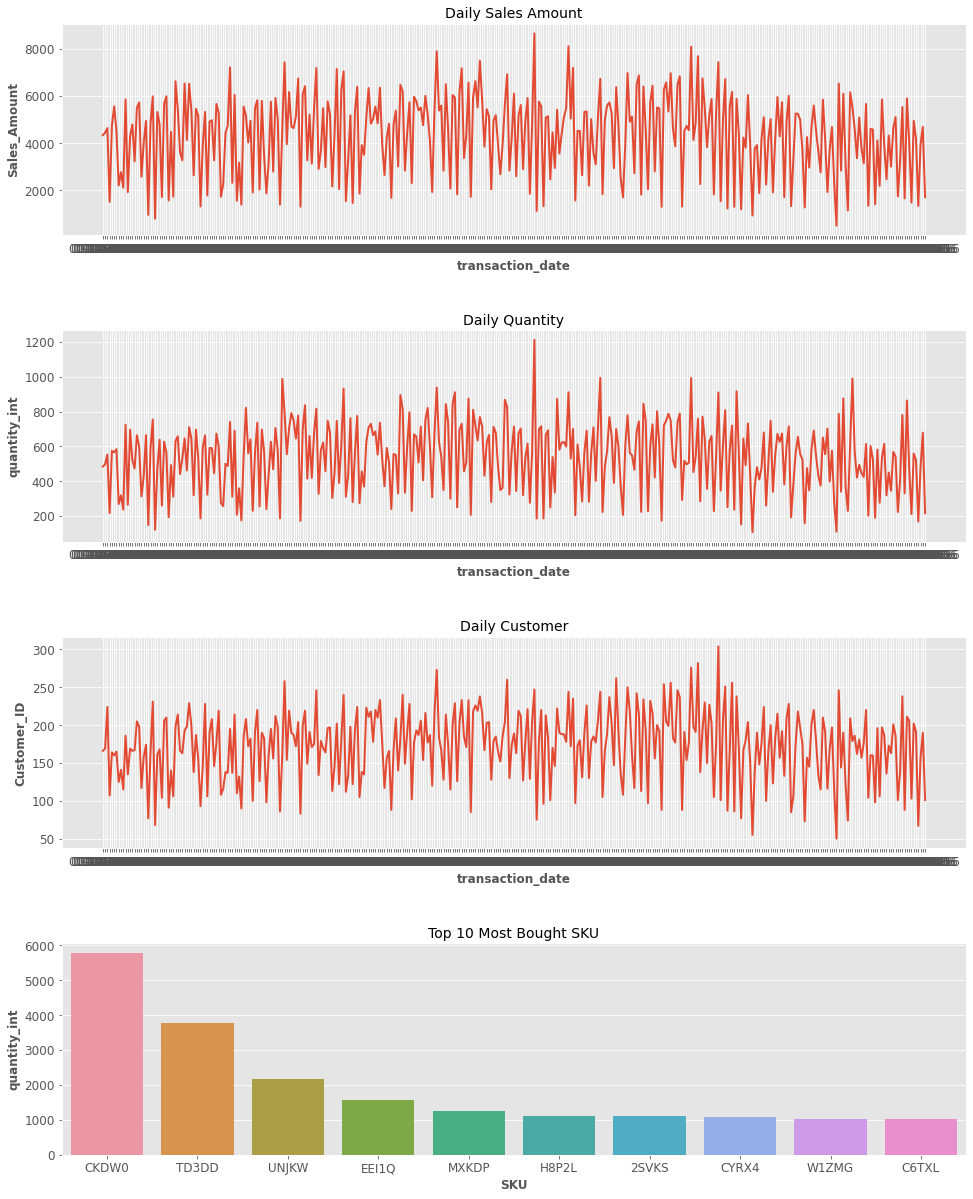

In [21]:
fig,ax = plt.subplots(4, 1, sharey=False, figsize=(15,18))
fig.tight_layout(pad=5.0)

ax[0].set_title("Daily Sales Amount")
agg_0 = data.groupby("transaction_date").sum()[["Sales_Amount"]]
sns.lineplot(x="transaction_date",y="Sales_Amount",data=agg_0,ax=ax[0])

ax[1].set_title("Daily Quantity")
agg_1 = data.groupby("transaction_date").sum()[["quantity_int"]]
sns.lineplot(x="transaction_date",y="quantity_int",data=agg_1,ax=ax[1])

ax[2].set_title("Daily Customer")
agg_2 = data[["transaction_date","Customer_ID"]].drop_duplicates().groupby(["transaction_date"]).count()[["Customer_ID"]].reset_index()
sns.lineplot(x="transaction_date",y="Customer_ID",data=agg_2,ax=ax[2])

ax[3].set_title("Top 10 Most Bought SKU")
agg_3 = data[["SKU","quantity_int"]].groupby("SKU").sum("quantity_int").sort_values(by="quantity_int",ascending=False).iloc[0:10].reset_index()
sns.barplot(x="SKU",y="quantity_int",data=agg_3,ax=ax[3])

plt.show()

In [22]:
np.mean(data2.groupby(['SKU'])['SKU'].count())

25.125143075162153

In [23]:
data2.loc[data2['SKU'  ]=='00GVC']

,Date,SKU_Category,SKU,Quantity,price,sales_in_dol,date,q
885,05-01-2016,1TS,00GVC,1.0,17.68,17.68,2016-01-05,1
54832,01-06-2016,1TS,00GVC,1.0,17.68,17.68,2016-06-01,2


In [24]:
data2

,Date,SKU_Category,SKU,Quantity,price,sales_in_dol,date,q
0,02-01-2016,X52,0EM7L,1.0,3.130000,3.13,2016-01-02,1
1,02-01-2016,2ML,68BRQ,1.0,5.460000,5.46,2016-01-02,1
2,02-01-2016,0H2,CZUZX,1.0,6.350000,6.35,2016-01-02,1
3,02-01-2016,0H2,549KK,1.0,5.590000,5.59,2016-01-02,1
4,02-01-2016,0H2,K8EHH,1.0,6.880000,6.88,2016-01-02,1
...,...,...,...,...,...,...,...,...
131701,04-07-2016,IEV,FO112,3.0,2.153333,6.46,2016-07-04,3
131702,04-07-2016,N8U,I36F2,1.0,4.500000,4.50,2016-07-04,3
131703,04-07-2016,U5F,4X8P4,1.0,5.190000,5.19,2016-07-04,3
131704,04-07-2016,0H2,ZVTO4,1.0,4.570000,4.57,2016-07-04,3


In [25]:
data3 =data2.drop(columns=['date','Date','Quantity'])
data3

,SKU_Category,SKU,price,sales_in_dol,q
0,X52,0EM7L,3.130000,3.13,1
1,2ML,68BRQ,5.460000,5.46,1
2,0H2,CZUZX,6.350000,6.35,1
3,0H2,549KK,5.590000,5.59,1
4,0H2,K8EHH,6.880000,6.88,1
...,...,...,...,...,...
131701,IEV,FO112,2.153333,6.46,3
131702,N8U,I36F2,4.500000,4.50,3
131703,U5F,4X8P4,5.190000,5.19,3
131704,0H2,ZVTO4,4.570000,4.57,3


q
1    361239.43
2    412197.32
3    378740.84
4    425861.03
Name: sales_in_dol, dtype: float64

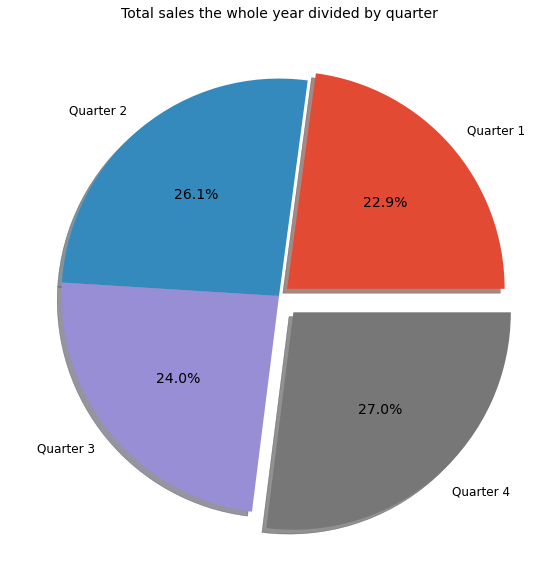

In [26]:
data3_grouped = data3.groupby(['q'])['sales_in_dol'].sum()
myexplode = [0.05,0,0,0.1]
plt.pie(data3_grouped,labels=[f'Quarter {i}' for i in range(1,5)],explode=myexplode, shadow = True,autopct='%1.1f%%')
plt.title('Total sales the whole year divided by quarter',)
data3_grouped

Text(0.5, 1.0, 'Top 10 Categories in sales the whole year')

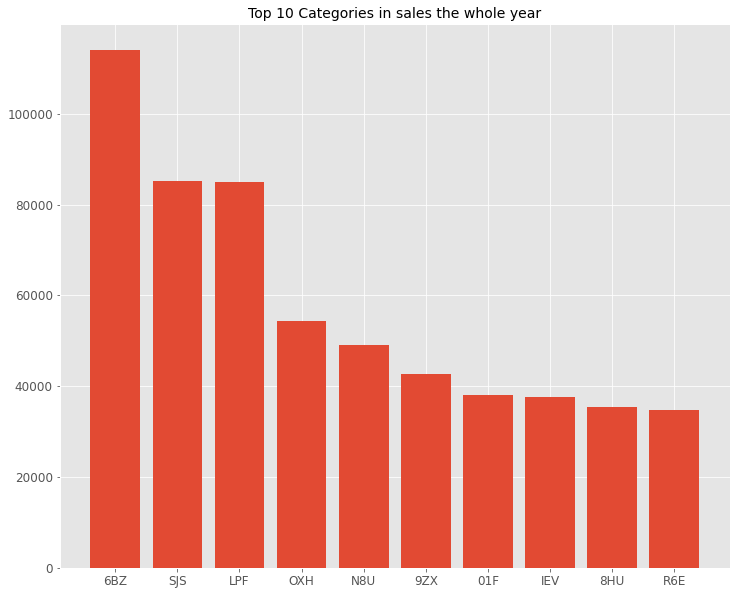

In [27]:
data3_grouped = data3.groupby(['SKU_Category'])['sales_in_dol'].sum()
data3_grouped = data3_grouped.sort_values(ascending=False) [0:10]

plt.bar(height= data3_grouped,x=data3_grouped.keys())
plt.title('Top 10 Categories in sales the whole year')


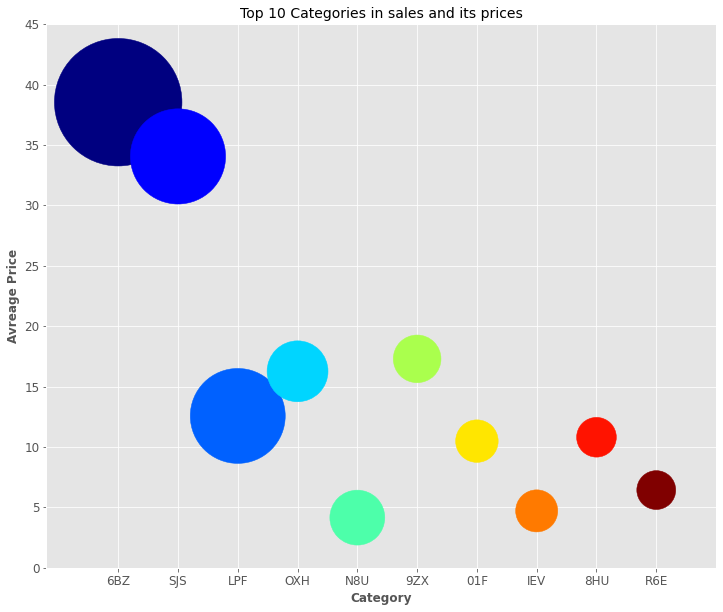

In [28]:
data3_grouped = data3.groupby(['SKU_Category'])['sales_in_dol'].sum()
data3_grouped2 = data3.groupby(['SKU_Category'])['price'].mean()

t = np.arange(10)

data3_grouped = data3_grouped.sort_values(ascending=False) [0:10]
data3_grouped2 = data3_grouped2[data3_grouped.keys()]

# data3_grouped2
plt.scatter(x=data3_grouped.keys(),y=data3_grouped2,s=data3_grouped**2/800000,c=t)
plt.ylim(0,45)
plt.xlim(-1.2,10)
plt.xlabel("Category")
plt.ylabel("Avreage Price")
plt.title('Top 10 Categories in sales and its prices')
plt.show()



Text(0.5, 1.0, 'Top 10 products in sales the whole year')

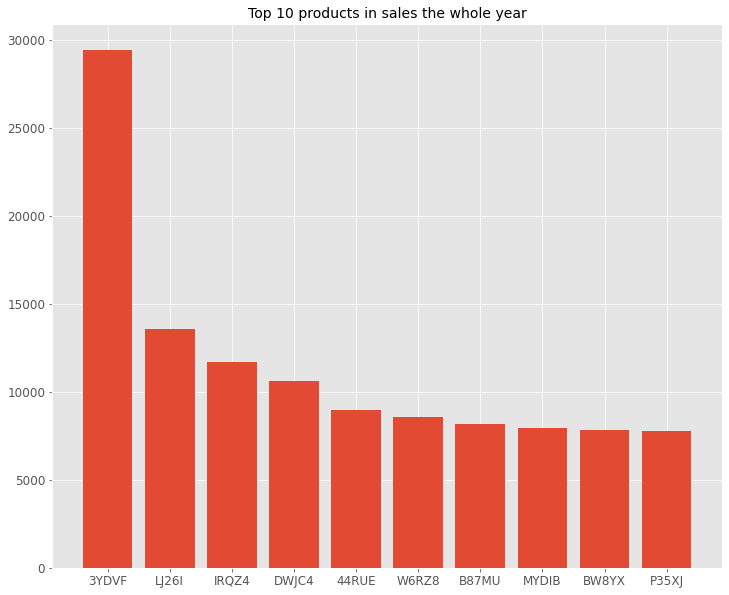

In [29]:
data3_grouped = data3.groupby(['SKU'])['sales_in_dol'].sum()
data3_grouped = data3_grouped.sort_values(ascending=False) [0:10]

plt.bar(height= data3_grouped,x=data3_grouped.keys())
plt.title('Top 10 products in sales the whole year')


# NEW

In [26]:
encoder = OneHotEncoder()
encoder2 = OneHotEncoder()


# Create an instance of the OneHotEncoder class
# encoder.fit(data['SKU_Category'].values.reshape(-1, 1))
encoder.fit(data['SKU_Category'].values.reshape(-1, 1))
encoder2.fit(data['SKU'].values.reshape(-1, 1))





df = pd.get_dummies(data3, prefix_sep='_', columns=['SKU_Category','SKU'])
# df= data3.copy()

# Create an instance of the LabelEncoder class
# df['SKU'] = lab.fit_transform(data['SKU'])
# df['SKU_Category']=lab2.fit_transform(data['SKU_Category'])


y = df['price']
X = df.drop(['price'], axis = 1)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42,test_size=0.3)

In [27]:
df

,price,sales_in_dol,q,SKU_Category_01F,SKU_Category_06Z,SKU_Category_0H2,SKU_Category_0KX,SKU_Category_0WT,SKU_Category_10Y,SKU_Category_144,...,SKU_ZWNCK,SKU_ZWWB5,SKU_ZX2UM,SKU_ZY9N9,SKU_ZYF2U,SKU_ZZ2AO,SKU_ZZDW7,SKU_ZZM1A,SKU_ZZNC5,SKU_ZZX6K
0,3.130000,3.13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.460000,5.46,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.350000,6.35,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.590000,5.59,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.880000,6.88,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131701,2.153333,6.46,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131702,4.500000,4.50,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131703,5.190000,5.19,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131704,4.570000,4.57,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
np.where( df.columns =='SKU_00GVC')

(array([190], dtype=int64),)

In [29]:
SKU_columns = encoder2.inverse_transform(df.iloc[:,190:])
cat_SKU_columns = encoder.inverse_transform(df.iloc[:,3:190])

In [30]:
# model = xgb.XGBRegressor(learning_rate=0.86,objective='reg:squarederror', n_estimators=400,
#  subsample =0.625,colsample_bytree= 0.625,use_rmm =True)


# model.fit(X_train, y_train, verbose = True,
# early_stopping_rounds=100, 
                    
# eval_set=[(X_test,y_test)])

model = xgb.XGBRegressor(learning_rate=0.4,objective='reg:squarederror', n_estimators=20,
 subsample =0.625,colsample_bytree= 0.6,use_rmm =True)

model.load_model('model_on_training_only_hot_encode.json')


predicted_y = model.predict(X_test)
print(metrics.r2_score (y_test, predicted_y))
print(metrics.mean_absolute_percentage_error (y_test, predicted_y))

0.9654880788240182
0.24454546738960026


In [31]:
print(f"accuracy_score: {np.round( metrics.r2_score (y_test, predicted_y)*100,2)}%")
print(metrics.mean_absolute_error(y_test, predicted_y))

accuracy_score: 96.55%
0.8808811841225757


In [32]:
X_test

,sales_in_dol,q,SKU_Category_01F,SKU_Category_06Z,SKU_Category_0H2,SKU_Category_0KX,SKU_Category_0WT,SKU_Category_10Y,SKU_Category_144,SKU_Category_1EO,...,SKU_ZWNCK,SKU_ZWWB5,SKU_ZX2UM,SKU_ZY9N9,SKU_ZYF2U,SKU_ZZ2AO,SKU_ZZDW7,SKU_ZZM1A,SKU_ZZNC5,SKU_ZZX6K
42684,12.11,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123769,5.37,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37614,6.07,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42282,2.04,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113166,7.12,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82411,6.35,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92196,4.02,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89038,4.35,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59037,4.00,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_test

42684      6.055000
123769     5.370000
37614      6.070000
42282      2.040000
113166     2.373333
            ...    
82411      6.350000
92196      4.020000
89038      4.350000
59037      4.000000
122342    75.350000
Name: price, Length: 39512, dtype: float64

In [34]:
SKU_columns = encoder2.inverse_transform(X_test.iloc[:,189:])
cat_SKU_columns = encoder.inverse_transform(X_test.iloc[:,2:189])

In [35]:
SKU_columns[:,0]

array(['1AORX', 'K2KD8', 'M6J9W', ..., '6X1O3', 'TL4WZ', 'LDPE9'],
      dtype=object)

In [98]:
fin_df = pd.DataFrame(np.concatenate([SKU_columns,cat_SKU_columns,y_test.to_numpy().reshape(-1, 1),
predicted_y.reshape(-1, 1)],axis=1),columns=['SKU_columns',
'cat_SKU_columns','Real Value','predictions_for_price'])
fin_df

,SKU_columns,cat_SKU_columns,Real Value,predictions_for_price
0,1AORX,FDS,6.055,5.879858
1,K2KD8,MU3,5.37,5.042908
2,M6J9W,N8U,6.07,6.192543
3,0HUPP,JPI,2.04,2.084519
4,DYMFI,TZB,2.373333,4.670931
...,...,...,...,...
39507,CZUZX,0H2,6.35,6.29428
39508,7Y2WS,P42,4.02,3.521698
39509,6X1O3,QV7,4.35,4.165478
39510,TL4WZ,N8U,4.0,3.953938


In [99]:
er = predicted_y-y_test.to_numpy()

<AxesSubplot:xlabel='SKU_columns'>

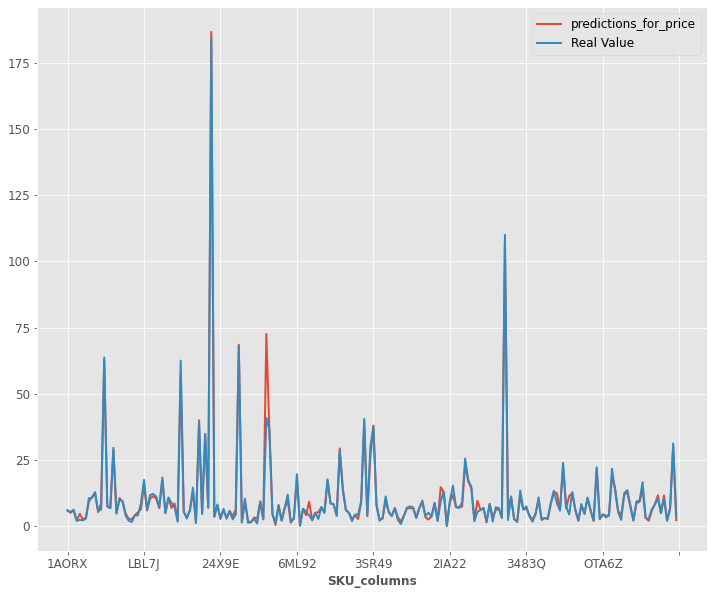

In [100]:
fin_df.iloc[0:200,:].plot(x='SKU_columns', y=['predictions_for_price','Real Value'], )

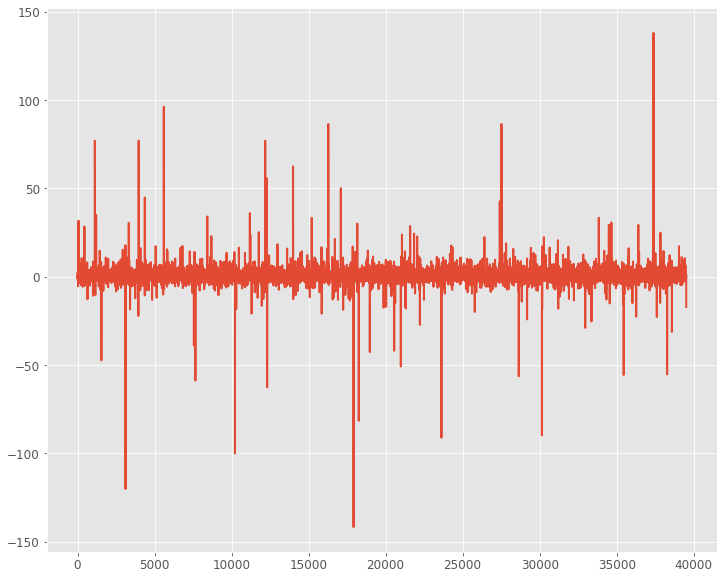

In [101]:
plt.plot(er)

In [44]:
X_test.iloc[0:3,:]

,sales_in_dol,q,SKU_Category_01F,SKU_Category_06Z,SKU_Category_0H2,SKU_Category_0KX,SKU_Category_0WT,SKU_Category_10Y,SKU_Category_144,SKU_Category_1EO,...,SKU_ZWNCK,SKU_ZWWB5,SKU_ZX2UM,SKU_ZY9N9,SKU_ZYF2U,SKU_ZZ2AO,SKU_ZZDW7,SKU_ZZM1A,SKU_ZZNC5,SKU_ZZX6K
42684,12.11,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123769,5.37,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37614,6.07,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
def increase_sales( X_test,y_test,model,encoder,encoder2, by = 10):
    x2 = X_test.copy()
    x2.loc[:,'sales_in_dol'] =np.multiply( x2.loc[:,'sales_in_dol'],(1+by/100))
    pred_of_increace_rev =model.predict(x2)
    predicted_y =model.predict(X_test)

    SKU_columns = encoder2.inverse_transform(X_test.iloc[:,189:])
    cat_SKU_columns = encoder.inverse_transform(X_test.iloc[:,2:189])   
    


    fin_df = pd.DataFrame(
        np.concatenate([SKU_columns,
        cat_SKU_columns,
        X_test.loc[:,['sales_in_dol','q']],
        y_test.to_numpy().reshape(-1, 1),
        predicted_y.reshape(-1, 1),
        x2.loc[:,['sales_in_dol']],
        pred_of_increace_rev.reshape(-1, 1)]
        ,axis=1),
            columns=['SKU_columns',
            'cat_SKU_columns','sales_in_dol','q','Real Price','predictions_for_price',f'New Sales_in_dol "With {by}% increase"',f"New Price to increace Sales_in_dol by {by}%"])
    return fin_df

In [66]:
def increase_sales_by_many( X_test,y_test,model,encoder,encoder2):
    by = [10,20,30,40,50]
    sales = X_test.copy().loc[:,'sales_in_dol'].to_numpy().reshape(-1,1)
    x3= X_test.to_numpy()

    SKU_columns = encoder2.inverse_transform(X_test.iloc[:,189:])
    cat_SKU_columns = encoder.inverse_transform(X_test.iloc[:,2:189])   


    xandy = np.zeros([X_test.shape[0],len(by)*2],dtype='float32')


    columnss=['SKU_columns',
            'cat_SKU_columns','sales_in_dol','q','Real Price','predictions_for_price']


    predicted_y= model.predict(X_test)


    new_df =np.concatenate([SKU_columns,
        cat_SKU_columns,
        X_test.loc[:,['sales_in_dol','q']],
        y_test.to_numpy(dtype='float32').reshape(-1, 1),
        predicted_y.reshape(-1, 1)],axis=1 )

    
    for i in range(5):
        xandy[:,i*2:i*2+1] =np.multiply ( sales.copy(),1+by[i]/100)

        xandy[:,i*2+1] = model.predict( np.concatenate([  xandy[:,i*2].reshape(-1,1), np.delete(x3,0,axis=1)],axis= 1))

        columnss.append(f'New Sales_in_dol "With {by[i]}% increase"')
        columnss.append(f"New Price to increace Sales_in_dol by {by[i]}%")






    fin_df = pd.DataFrame(
        np.concatenate([ new_df,
        xandy]
        ,axis=1),
            columns=columnss)
    return fin_df

In [103]:
x2 = X_test.copy()
x2.loc[:,'sales_in_dol'] =x2.loc[:,'sales_in_dol']*1.1
x2[x2['q']==3]

,sales_in_dol,q,SKU_Category_01F,SKU_Category_06Z,SKU_Category_0H2,SKU_Category_0KX,SKU_Category_0WT,SKU_Category_10Y,SKU_Category_144,SKU_Category_1EO,...,SKU_ZWNCK,SKU_ZWWB5,SKU_ZX2UM,SKU_ZY9N9,SKU_ZYF2U,SKU_ZZ2AO,SKU_ZZDW7,SKU_ZZM1A,SKU_ZZNC5,SKU_ZZX6K
93436,11.616,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85272,70.059,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124497,16.412,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131028,7.425,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88028,4.400,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86528,2.068,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76953,18.953,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69808,13.288,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85518,1.782,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
x3 = x2[x2['q']==3]

In [106]:
x3

,sales_in_dol,q,SKU_Category_01F,SKU_Category_06Z,SKU_Category_0H2,SKU_Category_0KX,SKU_Category_0WT,SKU_Category_10Y,SKU_Category_144,SKU_Category_1EO,...,SKU_ZWNCK,SKU_ZWWB5,SKU_ZX2UM,SKU_ZY9N9,SKU_ZYF2U,SKU_ZZ2AO,SKU_ZZDW7,SKU_ZZM1A,SKU_ZZNC5,SKU_ZZX6K
93436,11.616,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85272,70.059,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124497,16.412,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131028,7.425,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88028,4.400,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86528,2.068,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76953,18.953,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69808,13.288,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85518,1.782,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y_pred_if_price_10 = model.predict(x3)
y_pred_if_price_10[0:100]

array([  9.730199  ,  82.74184   ,   5.5056653 ,   6.9056687 ,
         4.7724147 ,   3.677497  ,   3.2662678 ,   5.042908  ,
         5.2053123 ,   6.753756  ,   8.206484  ,   9.69823   ,
         4.831365  ,  35.17091   ,   9.39063   , 205.90347   ,
         7.6378107 ,  33.68908   ,   0.45668897,   9.263673  ,
        19.005455  ,   4.539811  ,   5.312995  ,  10.679061  ,
        38.203518  ,   2.6604311 ,   6.007873  ,   7.8902297 ,
         3.8036356 ,   3.4380722 ,   5.0187798 ,   9.2850685 ,
         8.832738  ,   6.771114  ,  12.8599205 ,   5.927396  ,
         2.0845194 ,  26.619036  ,  20.908953  ,  12.790363  ,
         9.6398945 ,  14.1938715 ,   6.430718  ,  13.765554  ,
        34.873795  ,  17.738123  ,   9.178284  ,   3.5429468 ,
         3.1147819 ,   3.6999798 ,   5.042908  ,   1.193753  ,
         9.785763  ,   8.302047  ,   2.103812  ,   0.63675195,
        13.312391  ,   7.8902297 ,   3.3590062 ,   5.8335257 ,
         6.771114  ,   7.680434  ,   4.831365  ,  10.39

In [113]:
x4 = x3.copy()
x4['q']=x4['q']+1
x4


,sales_in_dol,q,SKU_Category_01F,SKU_Category_06Z,SKU_Category_0H2,SKU_Category_0KX,SKU_Category_0WT,SKU_Category_10Y,SKU_Category_144,SKU_Category_1EO,...,SKU_ZWNCK,SKU_ZWWB5,SKU_ZX2UM,SKU_ZY9N9,SKU_ZYF2U,SKU_ZZ2AO,SKU_ZZDW7,SKU_ZZM1A,SKU_ZZNC5,SKU_ZZX6K
93436,11.616,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85272,70.059,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124497,16.412,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131028,7.425,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88028,4.400,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86528,2.068,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76953,18.953,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69808,13.288,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85518,1.782,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
y_pred_if_price_10 = model.predict(x4)
y_pred_if_price_10[0:100]

array([  9.730199  ,  82.74184   ,   4.5639825 ,   6.9056687 ,
         6.7672706 ,   3.677497  ,   3.2662678 ,   5.042908  ,
         5.2053123 ,   6.753756  ,   8.206484  ,  10.635859  ,
         4.831365  ,  35.17091   ,   9.39063   , 205.20316   ,
         7.6378107 ,  33.68908   ,   0.45668897,   9.263673  ,
        17.110317  ,   4.539811  ,   5.312995  ,  10.679061  ,
        33.57336   ,   2.6604311 ,   6.007873  ,   7.8902297 ,
         3.8036356 ,   3.4380722 ,   5.0187798 ,   9.2850685 ,
         8.832738  ,   6.771114  ,  12.8599205 ,   5.927396  ,
         2.0845194 ,  26.619036  ,  20.908953  ,  12.790363  ,
         9.6398945 ,  14.1938715 ,   6.430718  ,  13.765554  ,
        34.873795  ,  17.738123  ,   9.178284  ,   3.5429468 ,
         3.1147819 ,   3.6999798 ,   5.042908  ,   1.193753  ,
         9.785763  ,   8.302047  ,   2.103812  ,   0.63675195,
        13.312391  ,   7.8902297 ,   3.3590062 ,   5.8335257 ,
         6.771114  ,   7.680434  ,   4.831365  ,  10.39

In [95]:
y_pred_if_price_10 =model.predict(x2)
y_pred_if_price_10[0:10]

array([ 7.8963537,  6.159725 ,  6.803931 ,  2.0845194,  5.7900467,
        2.5484414,  3.1147819,  9.730199 , 11.266382 , 12.456568 ],
      dtype=float32)

In [96]:
y_test[0:10]

42684      6.055000
123769     5.370000
37614      6.070000
42282      2.040000
113166     2.373333
47162      2.190000
115479     2.860000
93436     10.560000
60966     10.680000
97011     12.870000
Name: price, dtype: float64

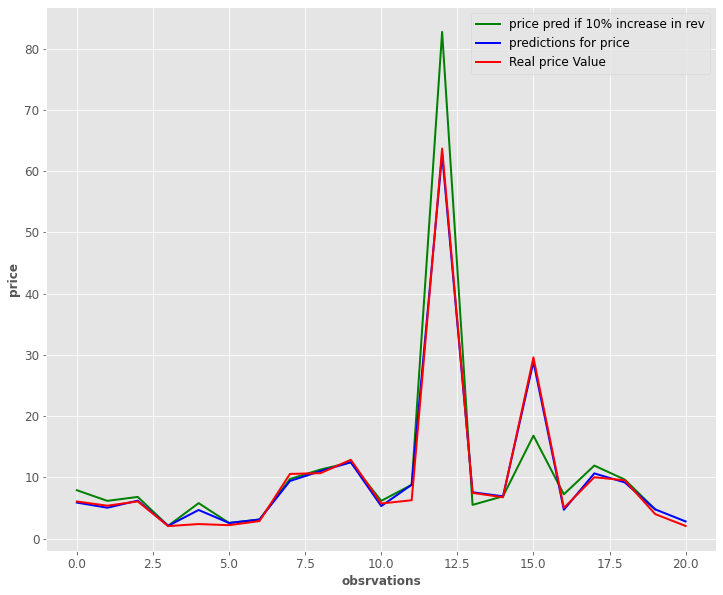

In [102]:
dis= 20

plt.plot(y_pred_if_price_10[0:dis],'g')
plt.plot(fin_df.loc[0:dis,'predictions_for_price'],'b')
plt.plot(fin_df.loc[0:dis,'Real Value'],'r')
plt.xlabel('obsrvations')
plt.ylabel('price')
plt.legend(['price pred if 10% increase in rev','predictions for price',"Real price Value"])
# fin_df.iloc[0:200,:].plot(x='SKU_columns', y=['predictions_for_price','Real Value'], )


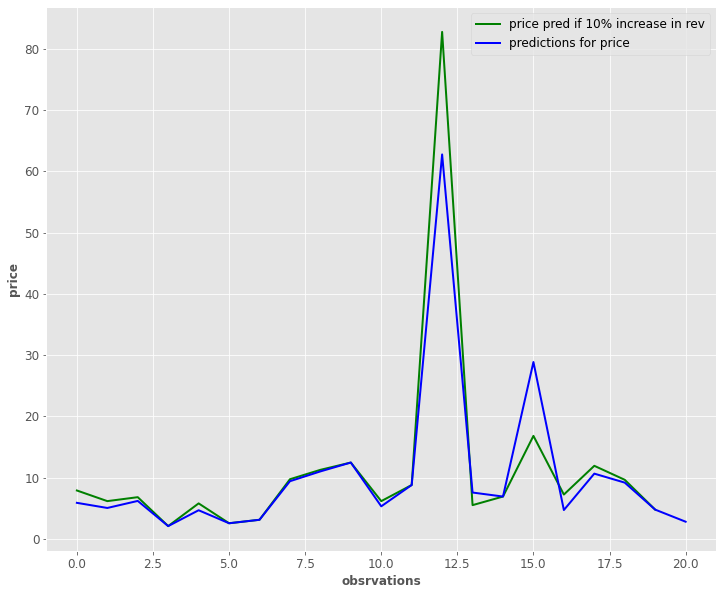

In [ ]:
dis= 20

plt.plot(y_pred_if_price_10[0:dis],'g')
plt.plot(fin_df.loc[0:dis,'predictions_for_price'],'b')
plt.xlabel('obsrvations')
plt.ylabel('price')
plt.legend(['price pred if 10% increase in rev','predictions for price'])
# fin_df.iloc[0:200,:].plot(x='SKU_columns', y=['predictions_for_price','Real Value'], )

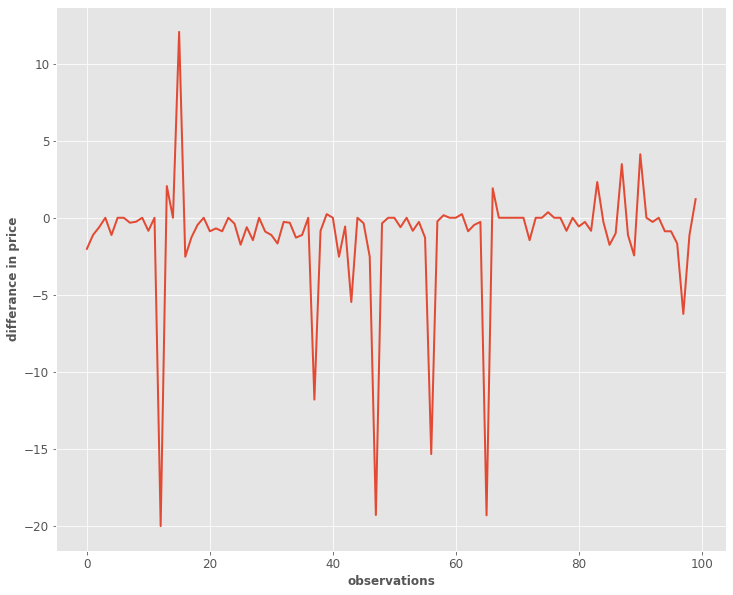

In [ ]:

er = predicted_y[0:100]-y_pred_if_price_10[0:100]
plt.plot(er)
plt.xlabel('observations')
plt.ylabel('differance in price')
plt.show()


In [53]:
SKU_columns = encoder2.inverse_transform(x2.iloc[:,189:])
cat_SKU_columns = encoder.inverse_transform(x2.iloc[:,2:189])   

fin_df = pd.DataFrame(
    np.concatenate([SKU_columns,
    cat_SKU_columns,
    X_test.loc[:,['sales_in_dol','q']],
    y_test.to_numpy().reshape(-1, 1),
    predicted_y.reshape(-1, 1),
    x2.loc[:,['sales_in_dol']],
    y_pred_if_price_10.reshape(-1, 1)]
    ,axis=1),
        columns=['SKU_columns',
        'cat_SKU_columns','sales_in_dol','q','Real Value','predictions_for_price','New Sales_in_dol "With 10% increase"',"New Price to increace Sales_in_dol by 10%"])


fin_df

,SKU_columns,cat_SKU_columns,sales_in_dol,q,Real Value,predictions_for_price,"New Sales_in_dol ""With 10% increase""",New Price to increace Sales_in_dol by 10%
0,1AORX,FDS,12.11,2.0,6.055,5.879858,13.321,7.896354
1,K2KD8,MU3,5.37,4.0,5.37,5.042908,5.907,6.159725
2,M6J9W,N8U,6.07,2.0,6.07,6.192543,6.677,6.803931
3,0HUPP,JPI,2.04,2.0,2.04,2.084519,2.244,2.084519
4,DYMFI,TZB,7.12,4.0,2.373333,4.670931,7.832,5.790047
...,...,...,...,...,...,...,...,...
39507,CZUZX,0H2,6.35,3.0,6.35,6.29428,6.985,6.905669
39508,7Y2WS,P42,4.02,4.0,4.02,3.521698,4.422,3.521698
39509,6X1O3,QV7,4.35,4.0,4.35,4.165478,4.785,5.042908
39510,TL4WZ,N8U,4.0,2.0,4.0,3.953938,4.4,3.953938


In [39]:
increase_sales(X_test,y_test,model, encoder,encoder2,by=10)

,SKU_columns,cat_SKU_columns,sales_in_dol,q,Real Price,predictions_for_price,"New Sales_in_dol ""With 10% increase""",New Price to increace Sales_in_dol by 10%
0,1AORX,FDS,12.11,2.0,6.055,5.879858,13.321,7.896354
1,K2KD8,MU3,5.37,4.0,5.37,5.042908,5.907,6.159725
2,M6J9W,N8U,6.07,2.0,6.07,6.192543,6.677,6.803931
3,0HUPP,JPI,2.04,2.0,2.04,2.084519,2.244,2.084519
4,DYMFI,TZB,7.12,4.0,2.373333,4.670931,7.832,5.790047
...,...,...,...,...,...,...,...,...
39507,CZUZX,0H2,6.35,3.0,6.35,6.29428,6.985,6.905669
39508,7Y2WS,P42,4.02,4.0,4.02,3.521698,4.422,3.521698
39509,6X1O3,QV7,4.35,4.0,4.35,4.165478,4.785,5.042908
39510,TL4WZ,N8U,4.0,2.0,4.0,3.953938,4.4,3.953938


In [40]:
df2 = increase_sales(X_test,y_test,model, encoder,encoder2,by=10)

<AxesSubplot:title={'center':'New Price to increace Sales_in_dol by 10% vs Prediction'}, xlabel='SKU_columns', ylabel='Price'>

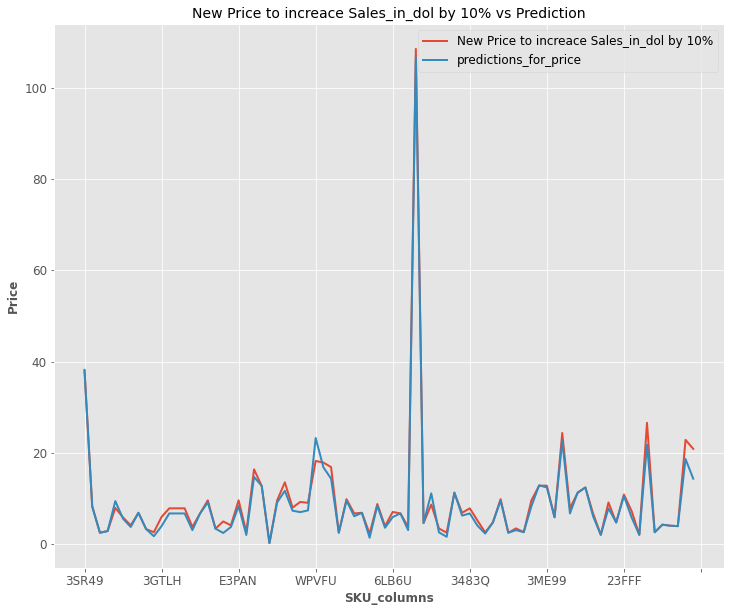

In [43]:
df2.iloc[100:180,].plot (x='SKU_columns',y=['New Price to increace Sales_in_dol by 10%','predictions_for_price'] ,ylabel='Price',title='New Price to increace Sales_in_dol by 10% vs Prediction')

In [52]:
catedd = df2.groupby(['SKU_columns','cat_SKU_columns']).mean().iloc[10:20]

<AxesSubplot:title={'center':'Sales increase for each product'}, xlabel='SKU_columns,cat_SKU_columns', ylabel='Sales'>

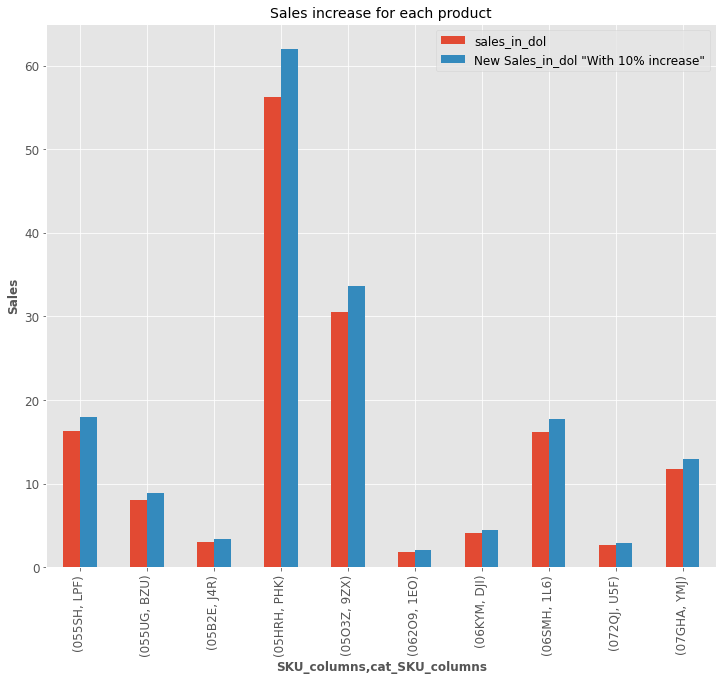

In [54]:
catedd.plot.bar(y = ['sales_in_dol','New Sales_in_dol "With 10% increase"'], ylabel= 'Sales',title= 'Sales increase for each product')

<AxesSubplot:title={'center':'Price Change for each product'}, xlabel='SKU_columns,cat_SKU_columns', ylabel='Price'>

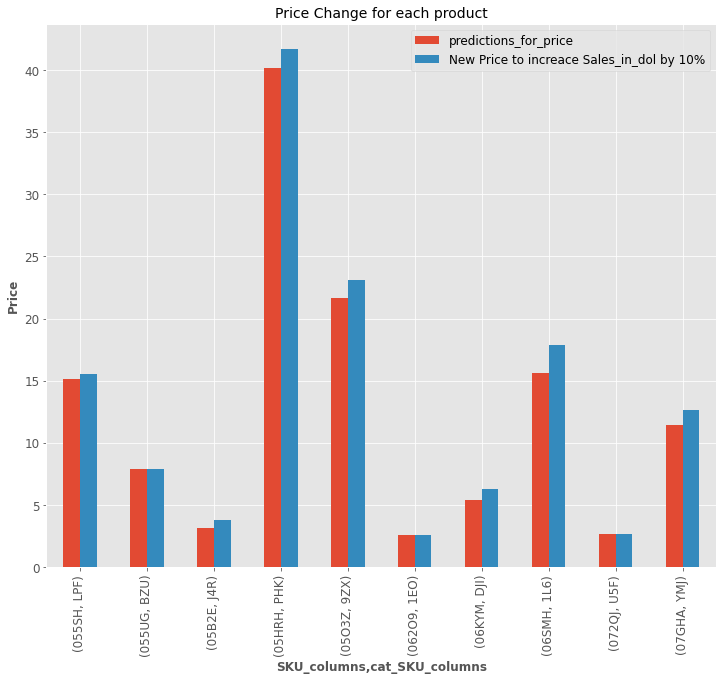

In [88]:
catedd.plot.bar(y = ['predictions_for_price','New Price to increace Sales_in_dol by 10%'], ylabel= 'Price',title= 'Price Change for each product')

In [60]:
catedd2 = df2.groupby(['SKU_columns','cat_SKU_columns','q']).mean().iloc[30:40]

<AxesSubplot:title={'center':'Sales increase for each product for each quarter'}, xlabel='SKU_columns,cat_SKU_columns,q', ylabel='Sales'>

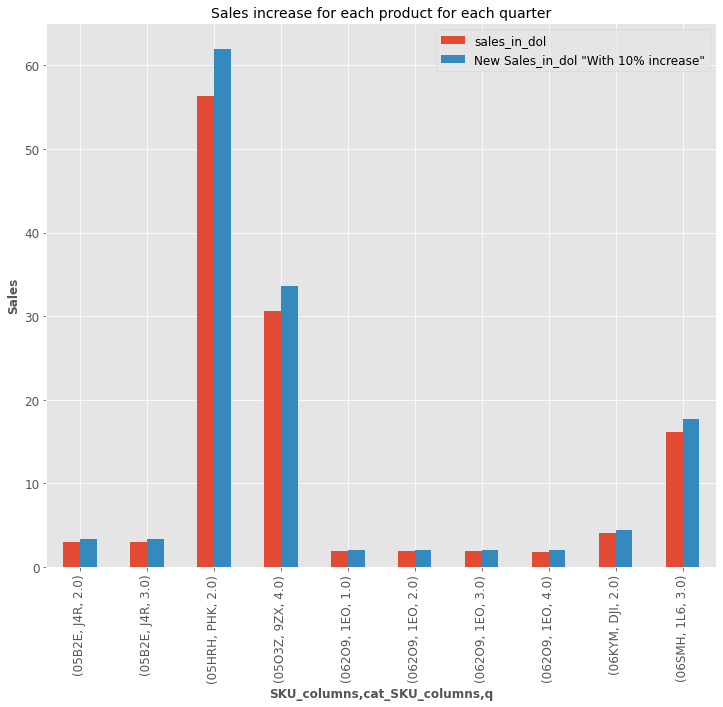

In [89]:
catedd2.plot.bar(y = ['sales_in_dol','New Sales_in_dol "With 10% increase"'], ylabel= 'Sales',title= 'Sales increase for each product for each quarter')

<AxesSubplot:title={'center':'Prices for each product for each quarter'}, xlabel='SKU_columns,cat_SKU_columns,q', ylabel='Prices'>

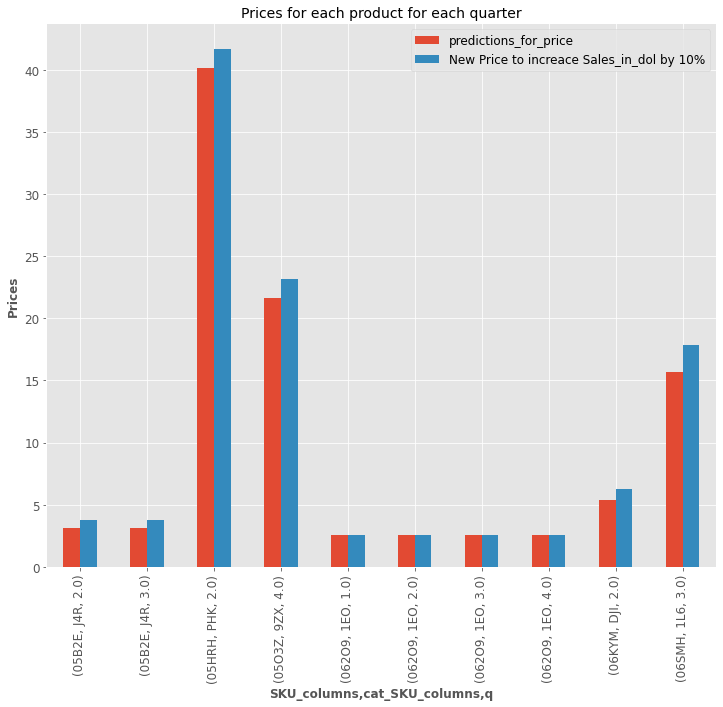

In [90]:
catedd2.plot.bar(y = ['predictions_for_price','New Price to increace Sales_in_dol by 10%'], ylabel= 'Prices',title= 'Prices for each product for each quarter')

In [93]:
New_df= increase_sales_by_many(X_test,y_test,model, encoder,encoder2)

In [75]:
New_df.head()

,SKU_columns,cat_SKU_columns,sales_in_dol,q,Real Price,predictions_for_price,"New Sales_in_dol ""With 10% increase""",New Price to increace Sales_in_dol by 10%,"New Sales_in_dol ""With 20% increase""",New Price to increace Sales_in_dol by 20%,"New Sales_in_dol ""With 30% increase""",New Price to increace Sales_in_dol by 30%,"New Sales_in_dol ""With 40% increase""",New Price to increace Sales_in_dol by 40%,"New Sales_in_dol ""With 50% increase""",New Price to increace Sales_in_dol by 50%
0,1AORX,FDS,12.11,2.0,6.055,5.879858,13.321,7.896354,14.532,7.832251,15.743,4.689023,16.954,6.545474,18.165001,6.924485
1,K2KD8,MU3,5.37,4.0,5.37,5.042908,5.907,6.159725,6.444,6.159725,6.981,6.771114,7.518,6.771114,8.055,7.89023
2,M6J9W,N8U,6.07,2.0,6.07,6.192543,6.677,6.803931,7.284,7.337146,7.891,5.019206,8.498,7.680434,9.105,7.680434
3,0HUPP,JPI,2.04,2.0,2.04,2.084519,2.244,2.084519,2.448,2.084519,2.652,2.650861,2.856,2.650861,3.06,2.650861
4,DYMFI,TZB,7.12,4.0,2.373333,4.670931,7.832,5.790047,8.544,5.790047,9.256,7.078106,9.968,7.078106,10.68,7.539717


In [58]:
numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64']
small_new_df =  New_df.iloc[0:10000]


In [59]:
small_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   SKU_columns                                10000 non-null  object
 1   cat_SKU_columns                            10000 non-null  object
 2   sales_in_dol                               10000 non-null  object
 3   q                                          10000 non-null  object
 4   Real Price                                 10000 non-null  object
 5   predictions_for_price                      10000 non-null  object
 6   New Sales_in_dol "With 10% increase"       10000 non-null  object
 7   New Price to increace Sales_in_dol by 10%  10000 non-null  object
 8   New Sales_in_dol "With 20% increase"       10000 non-null  object
 9   New Price to increace Sales_in_dol by 20%  10000 non-null  object
 10  New Sales_in_dol "With 30% increase

In [60]:
for i in small_new_df.columns.to_list()[2:]:
    small_new_df[i] = small_new_df[i].astype(float)

C:\Users\Mario\AppData\Local\Temp\ipykernel_15228\3711267687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_new_df[i] = small_new_df[i].astype(float)


In [61]:
small_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   SKU_columns                                10000 non-null  object 
 1   cat_SKU_columns                            10000 non-null  object 
 2   sales_in_dol                               10000 non-null  float64
 3   q                                          10000 non-null  float64
 4   Real Price                                 10000 non-null  float64
 5   predictions_for_price                      10000 non-null  float64
 6   New Sales_in_dol "With 10% increase"       10000 non-null  float64
 7   New Price to increace Sales_in_dol by 10%  10000 non-null  float64
 8   New Sales_in_dol "With 20% increase"       10000 non-null  float64
 9   New Price to increace Sales_in_dol by 20%  10000 non-null  float64
 10  New Sales_in_dol "With 

C:\Users\Mario\AppData\Local\Temp\ipykernel_15228\1708466143.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


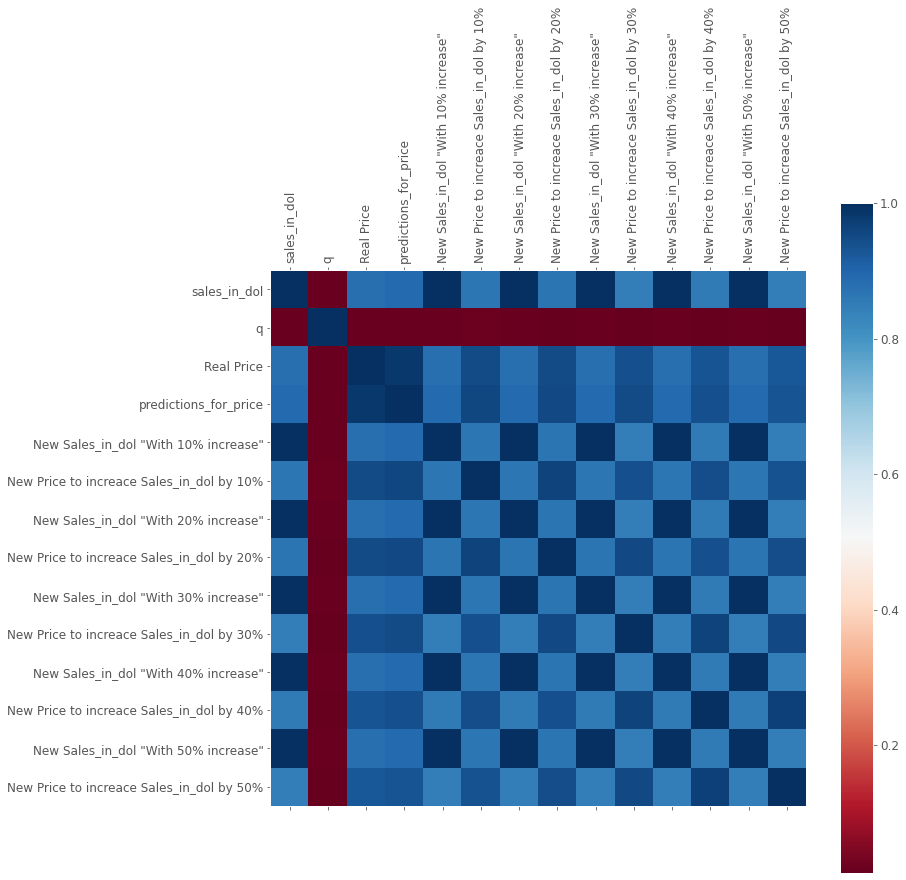

In [62]:
draw_corr( small_new_df.select_dtypes(include=numerics) )

In [92]:
small_new_df.iloc[40:80,].plot (x='SKU_columns',y=['predictions_for_price'] ,ylabel='Price',title='Real Price vs Prediction')

NameError: name 'small_new_df' is not defined

<AxesSubplot:title={'center':'Prices for products to increace the sales'}, xlabel='SKU_columns', ylabel='Price'>

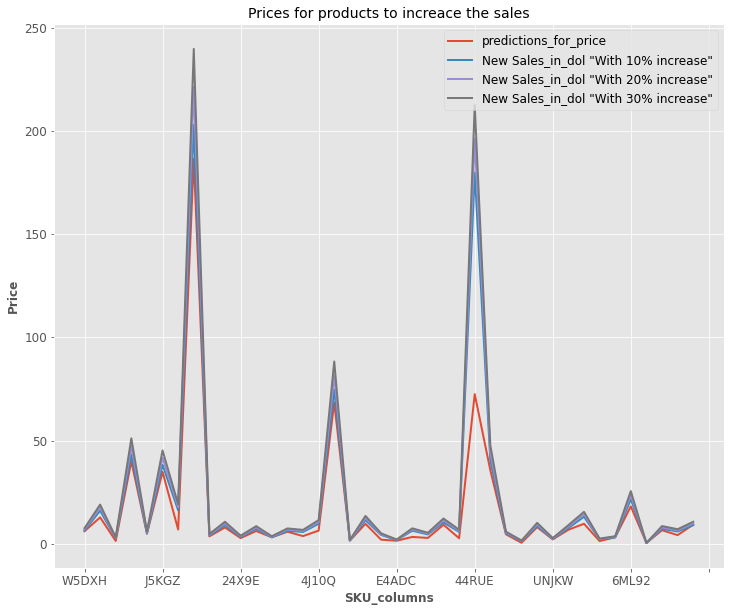

In [64]:
small_new_df.iloc[40:80,].plot (x='SKU_columns',y=['predictions_for_price','New Sales_in_dol "With 10% increase"',
'New Sales_in_dol "With 20% increase"','New Sales_in_dol "With 30% increase"'] ,ylabel='Price',title='Prices for products to increace the sales')

In [65]:
small_new_df

,SKU_columns,cat_SKU_columns,sales_in_dol,q,Real Price,predictions_for_price,"New Sales_in_dol ""With 10% increase""",New Price to increace Sales_in_dol by 10%,"New Sales_in_dol ""With 20% increase""",New Price to increace Sales_in_dol by 20%,"New Sales_in_dol ""With 30% increase""",New Price to increace Sales_in_dol by 30%,"New Sales_in_dol ""With 40% increase""",New Price to increace Sales_in_dol by 40%,"New Sales_in_dol ""With 50% increase""",New Price to increace Sales_in_dol by 50%
0,1AORX,FDS,12.11,2.0,6.055000,5.879858,13.321,7.896354,14.532,7.832251,15.743,4.689023,16.954,6.545474,18.165001,6.924485
1,K2KD8,MU3,5.37,4.0,5.370000,5.042908,5.907,6.159725,6.444,6.159725,6.981,6.771114,7.518,6.771114,8.055000,7.890230
2,M6J9W,N8U,6.07,2.0,6.070000,6.192543,6.677,6.803931,7.284,7.337146,7.891,5.019206,8.498,7.680434,9.105000,7.680434
3,0HUPP,JPI,2.04,2.0,2.040000,2.084519,2.244,2.084519,2.448,2.084519,2.652,2.650861,2.856,2.650861,3.060000,2.650861
4,DYMFI,TZB,7.12,4.0,2.373333,4.670931,7.832,5.790047,8.544,5.790047,9.256,7.078106,9.968,7.078106,10.680000,7.539717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Z2RE8,N8U,1.86,4.0,1.860000,1.714151,2.046,1.714151,2.232,1.714151,2.418,1.714151,2.604,2.280490,2.790000,2.280490
9996,7GQRJ,YMJ,11.38,4.0,11.380000,11.103170,12.518,12.979095,13.656,12.979095,14.794,12.914993,15.932,15.442460,17.070000,15.442460
9997,ZDSYK,N8U,2.17,1.0,2.170000,2.336898,2.387,2.336898,2.604,2.903239,2.821,2.903239,3.038,2.903239,3.255000,2.903239
9998,Y8N00,JPI,0.88,1.0,0.880000,0.563696,0.968,0.563696,1.056,1.193753,1.144,1.193753,1.232,1.193753,1.320000,1.193753


In [79]:
small_new_df.groupby(['SKU_columns','cat_SKU_columns']).mean()

,,sales_in_dol,q,Real Price,predictions_for_price,"New Sales_in_dol ""With 10% increase""",New Price to increace Sales_in_dol by 10%,"New Sales_in_dol ""With 20% increase""",New Price to increace Sales_in_dol by 20%,"New Sales_in_dol ""With 30% increase""",New Price to increace Sales_in_dol by 30%,"New Sales_in_dol ""With 40% increase""",New Price to increace Sales_in_dol by 40%,"New Sales_in_dol ""With 50% increase""",New Price to increace Sales_in_dol by 50%
SKU_columns,cat_SKU_columns,,,,,,,,,,,,,,
00OK1,J4R,1.270000,2.666667,1.270000,1.657675,1.397000,1.657675,1.524000,1.657675,1.651000,1.657675,1.778000,2.548441,1.905000,2.548441
0121I,XG4,4.050000,1.000000,2.025000,3.933148,4.455000,4.810579,4.860000,4.810579,5.265000,4.810579,5.670000,5.080666,6.075000,5.927396
01IEO,XVK,5.965000,1.750000,5.965000,4.685544,6.561500,5.144086,7.158000,5.211608,7.754500,6.262627,8.351000,6.415474,8.947500,7.381518
01IQT,Z4O,1.500000,1.000000,1.500000,1.657675,1.650000,1.657675,1.800000,2.548441,1.950000,2.548441,2.100000,2.548441,2.250000,2.548441
01V7M,B93,8.775000,3.000000,8.775000,9.901713,9.652500,10.132518,10.530000,10.694388,11.407500,11.863156,12.285000,11.780997,13.162500,11.959778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWFSY,W41,3.148333,1.666667,0.572056,-0.374396,3.463167,-0.233274,3.778000,-0.132000,4.092833,0.014239,4.407667,0.381681,4.722500,0.381681
ZYF2U,8LP,9.380000,1.000000,9.380000,11.542198,10.318000,12.003809,11.256000,11.839491,12.194000,13.715416,13.132000,13.715416,14.070000,13.715416
ZZDW7,GVG,30.120000,3.000000,30.120001,28.173655,33.132000,26.966232,36.144001,32.658329,39.155998,33.010609,42.167999,27.706293,45.180000,30.443777


In [91]:
small_new_df.groupby(['SKU_columns']).mean()

NameError: name 'small_new_df' is not defined

In [87]:
cated = small_new_df.groupby(['SKU_columns','cat_SKU_columns']).mean().iloc[0:15]

<AxesSubplot:xlabel='SKU_columns,cat_SKU_columns', ylabel='Sales'>

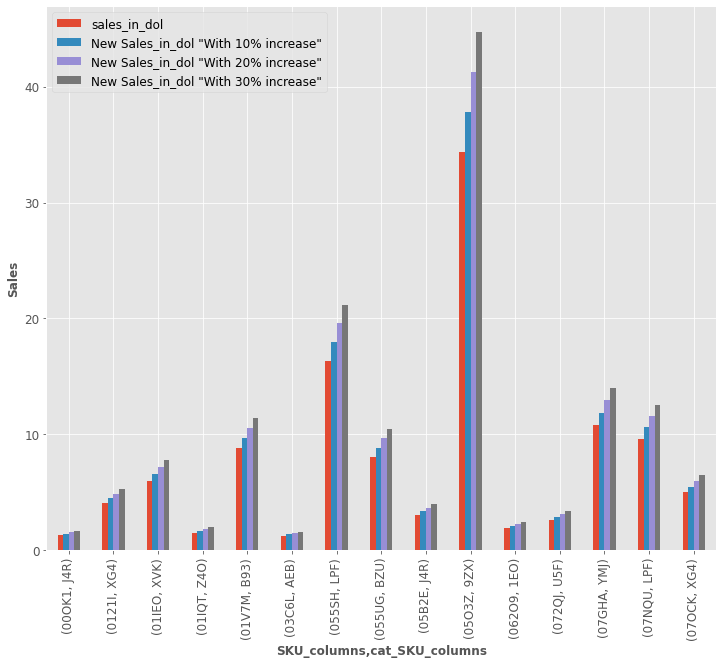

In [88]:
cated.plot.bar(y = ['sales_in_dol','New Sales_in_dol "With 10% increase"',
'New Sales_in_dol "With 20% increase"','New Sales_in_dol "With 30% increase"'], ylabel= 'Sales')

<AxesSubplot:xlabel='SKU_columns,cat_SKU_columns', ylabel='price'>

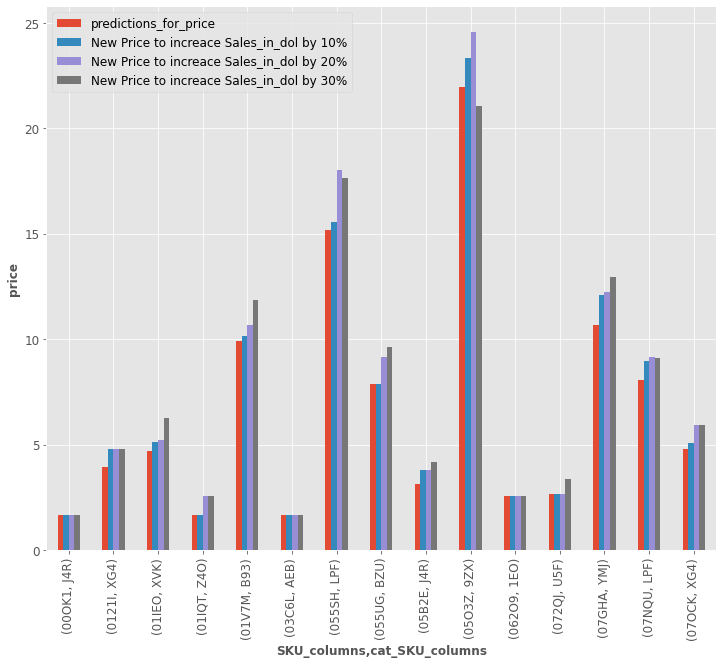

In [89]:
cated.plot.bar(y = ['predictions_for_price','New Price to increace Sales_in_dol by 10%',
'New Price to increace Sales_in_dol by 20%','New Price to increace Sales_in_dol by 30%'], ylabel= 'price')

In [73]:
best_prices_df =  New_df.groupby(['SKU_columns','cat_SKU_columns','q']).mean()

In [87]:
New_df['SKU_columns'].value_counts()

UNJKW    563
OV1P9    252
COWU2    249
C6TXL    221
M6J9W    210
        ... 
CGCWS      1
PNZQE      1
Q5PL4      1
9WL2Q      1
1IP8U      1
Name: SKU_columns, Length: 3943, dtype: int64

In [76]:
best_prices_df

sales_in_dol  Real Price  \
SKU_columns cat_SKU_columns q                               
00GVC       1TS             1.0     17.680000   17.680000   
00OK1       J4R             1.0      1.270000    1.270000   
                            2.0      1.270000    1.270000   
                            3.0      1.270000    1.270000   
                            4.0      1.270000    1.270000   
...                                       ...         ...   
ZZM1A       LPF             1.0     12.916667    6.412222   
                            2.0     15.595000    6.236667   
                            3.0     12.460000    6.230000   
                            4.0     12.456667    6.228333   
ZZNC5       LPF             4.0     10.790000   10.790000   

                                 predictions_for_price  \
SKU_columns cat_SKU_columns q                            
00GVC       1TS             1.0              15.567323   
00OK1       J4R             1.0               1.657675   
                            2.0               1.657675   
                            3.0               1.657675   
                            4.0               1.657675   
...                                                ...   
ZZM1A       LPF             1.0               8.456843   
                            2.0               9.783334   
                            3.0               8.529318   
                            4.0               8.529318   
ZZNC5       LPF             4.0               8.903433   

                                 New Sales_in_dol "With 10% increase"  \
SKU_columns cat_SKU_columns q                                           
00GVC       1TS             1.0                             19.448000   
00OK1       J4R             1.0                              1.397000   
                            2.0                              1.397000   
                            3.0                              1.397000   
                            4.0                              1.397000   
...                                                               ...   
ZZM1A       LPF             1.0                             14.208333   
                            2.0                             17.154500   
                            3.0                             13.706000   
                            4.0                             13.702333   
ZZNC5       LPF             4.0                             11.869000   

                                 New Price to increace Sales_in_dol by 10%  \
SKU_columns cat_SKU_columns q                                                
00GVC       1TS             1.0                                  18.033638   
00OK1       J4R             1.0                                   1.657675   
                            2.0                                   1.657675   
                            3.0                                   1.657675   
                            4.0                                   1.657675   
...                                                                    ...   
ZZM1A       LPF             1.0                                   8.518962   
                            2.0                                  10.617052   
                            3.0                                   8.529318   
                            4.0                                   8.529318   
ZZNC5       LPF             4.0                                   9.226810   

                                 New Sales_in_dol "With 20% increase"  \
SKU_columns cat_SKU_columns q                                           
00GVC       1TS             1.0                                21.216   
00OK1       J4R             1.0                                 1.524   
                            2.0                                 1.524   
                            3.0                                 1.524   
                            4.0                                 1.524   
...     

<AxesSubplot:xlabel='cat_SKU_columns,q', ylabel='Prices'>

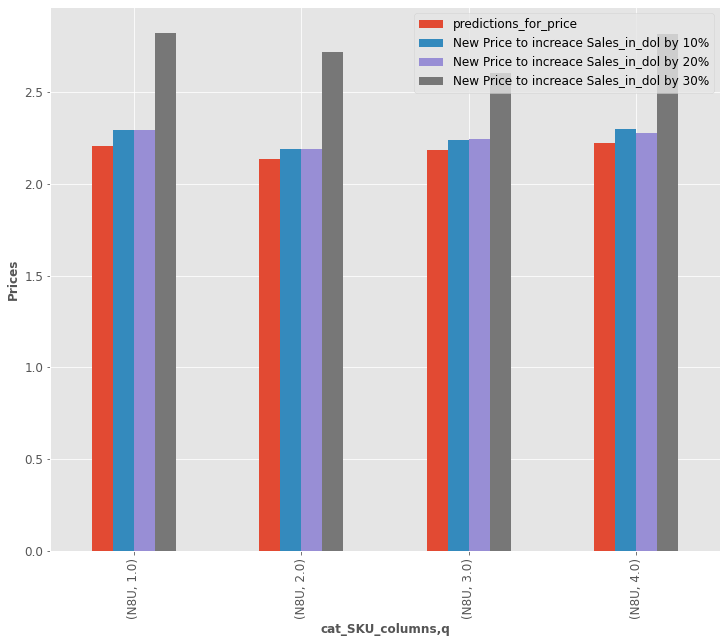

In [84]:
best_prices_df.loc['UNJKW'].plot.bar(y = ['predictions_for_price','New Price to increace Sales_in_dol by 10%',
'New Price to increace Sales_in_dol by 20%','New Price to increace Sales_in_dol by 30%'], ylabel= 'Prices')

<AxesSubplot:xlabel='cat_SKU_columns,q', ylabel='Prices'>

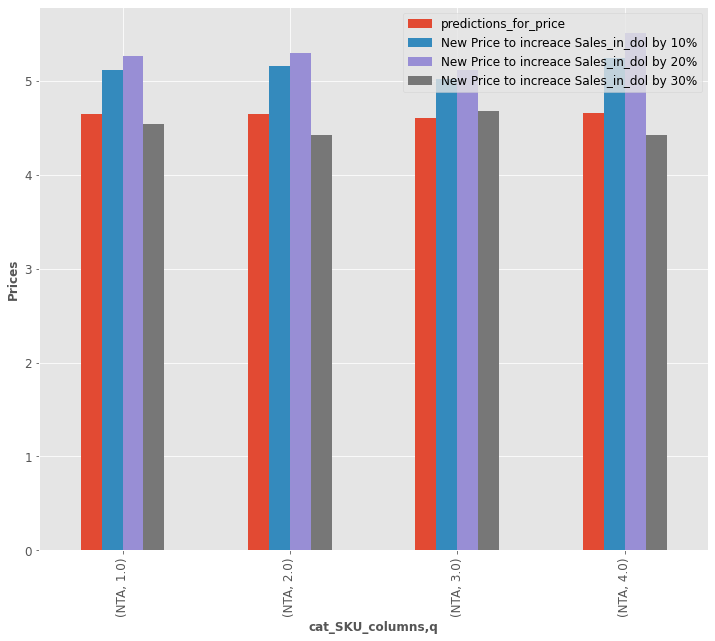

In [86]:
best_prices_df.loc['C6TXL'].plot.bar(y = ['predictions_for_price','New Price to increace Sales_in_dol by 10%',
'New Price to increace Sales_in_dol by 20%','New Price to increace Sales_in_dol by 30%'], ylabel= 'Prices')

<AxesSubplot:xlabel='cat_SKU_columns,q', ylabel='Prices'>

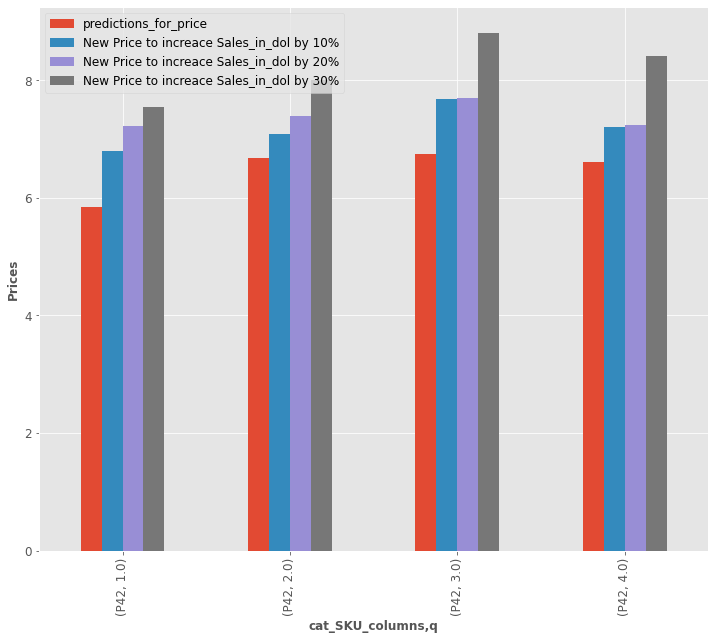

In [ ]:
best_prices_df.loc['OV1P9'].plot.bar(y = ['predictions_for_price','New Price to increace Sales_in_dol by 10%',
'New Price to increace Sales_in_dol by 20%','New Price to increace Sales_in_dol by 30%'], ylabel= 'Prices')

## Storing the model and recalling it 

![Screenshot 2023-01-31 183346.png](attachment:Screenshot 2023-01-31 183346.png)
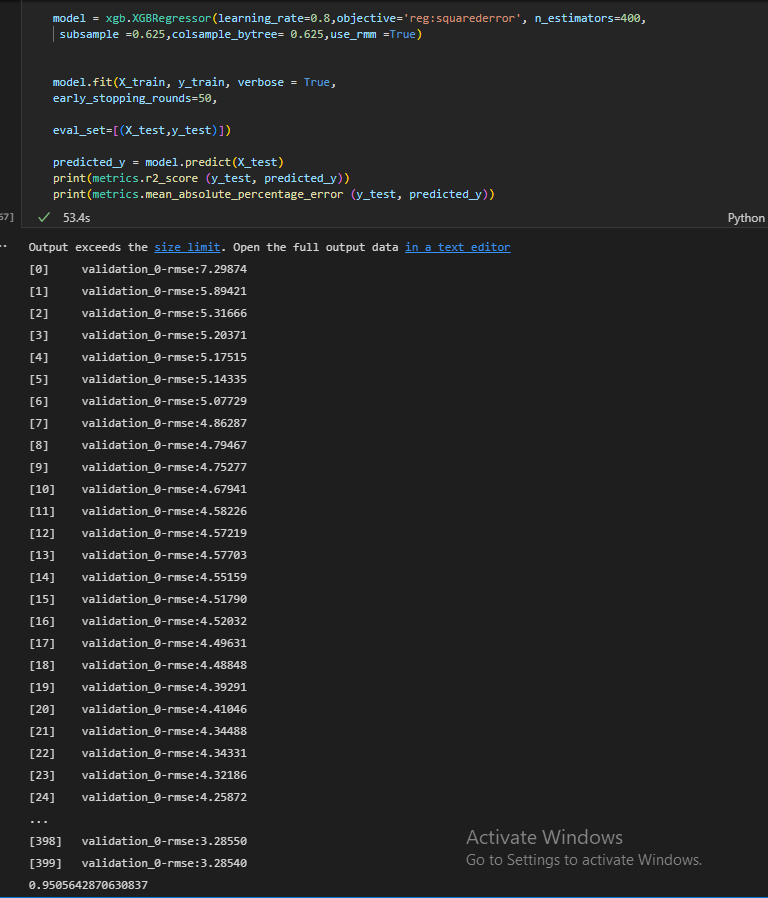

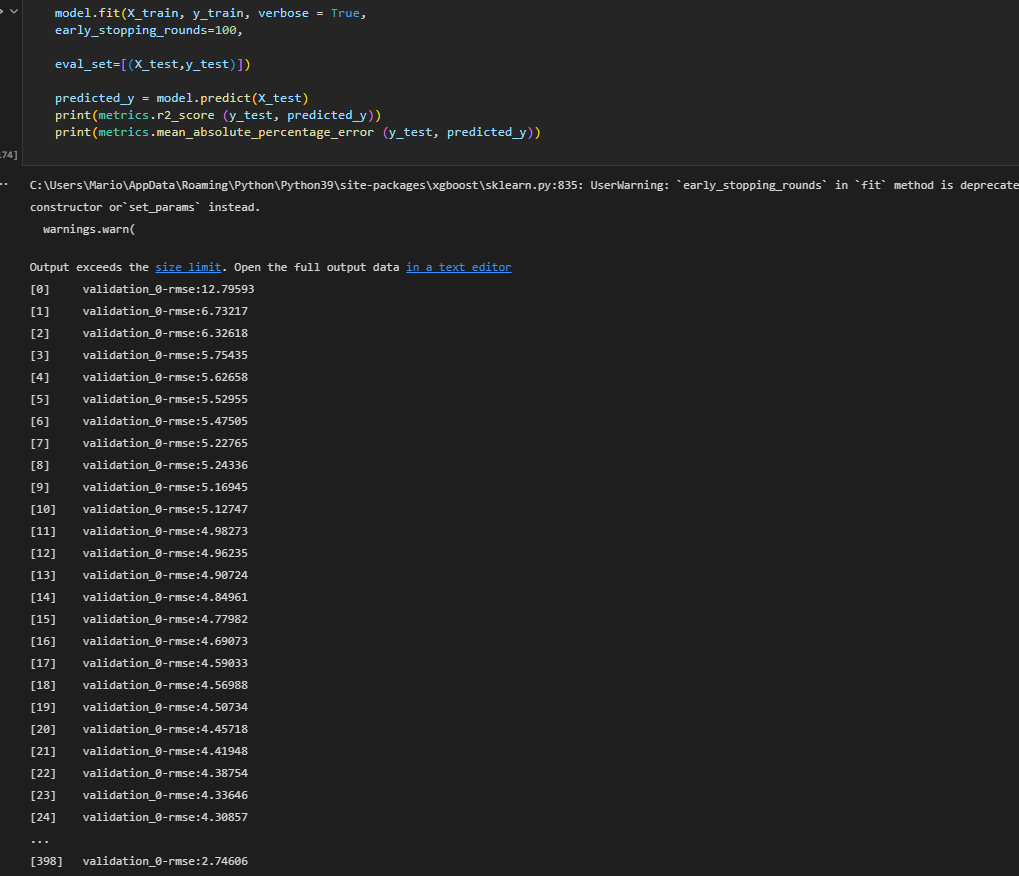